# Etivity 1.1.1: Modelling an infected cohort

In this etivity, you will code your first simple model and use it to answer a research question. To get used to the format for models in R, we'll start by giving you some parts of the code, and you need to fill in the missing numbers or code blocks by replacing the *#YOUR CODE#* placeholders. At the end of each etivity, we'll provide a solution file that contains the full code, annotated with comments. Make sure you understand each line, and soon you'll be able to write your own model from scratch!

Your task is to find out how long it takes for
a cohort of infected people to recover. As you saw in the video,
to answer this question you need to keep track of 2 populations: 
those that are infected (compartment I), and those that have recovered (compartment R). 
Infected people recover at a rate *gamma*. The differential equations describing this are:

\begin{align}
\frac{dI}{dt} & = -\gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

Load the packages which you need for this etivity, by running the following cell:

In [8]:
library(deSolve)   # package to solve the model
library(reshape2)  # package to change the shape of the model output
library(ggplot2)   # package for plotting

To start, it is useful to code what we know about the situation we want to model.
We are looking at a cohort of 10$^6$ currently infected people, and no one has recovered so far. The average duration of infection is 10 days. The question we want to answer is how many people will recover from the infection over a 4-week period.

Given this data, fill in the correct values to the following variables, and run the cell:

In [9]:
initial_number_infected <- 1000000  # the initial infected population size
initial_number_recovered <- 0#YOUR CODE#  # the initial number of people in the recovered state
recovery_rate <- 0.1            # the rate of recovery gamma, in units of days^-1
follow_up_duration <- 4*7 #YOUR CODE#        # the duration to run the model for, in units of days
  
# Hint: the units of the recovery rate and the follow-up duration should be consistent.

Now, we combine this data into objects that are recognised by the deSolve package as **model input**. To do this, again run the code below.

In [10]:
# The initial state values are stored as a vector and each value is assigned a name.
initial_state_values <- c(I = initial_number_infected, 
                          R = initial_number_recovered)

# Parameters are also stored as a vector with assigned names and values. 
parameters <- c(gamma = recovery_rate)  
# In this case we only have one parameter, gamma.

Think about: what kind of information is stored in the *initial_state_values* and *parameters* vectors?

Additionally, we need to specify the time we want the model to run for. This depends on the question we want to answer. In the cell below, the duration you specified earlier is automatically filled in when you run it.

In [11]:
# The times vector creates a sequence of timepoints at which we want to calculate the number of people 
# in the I and R compartment.
times <- seq(from = 0, to = follow_up_duration, by = 1) 

Think about: what kind of information is stored in the *times* vector?

Check your answers by having a look at each of these vectors to familiarise yourself with the structure: in the following code cell we have typed the object names, so you just need to press "Run" to see what each of them contains.

In [12]:
initial_state_values
parameters
times

I     R 
1e+06 0e+00

gamma 
  0.1

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28

The next step is specifying the model. Using the example code in the introductory document, complete the following model function with the differential equations above.

In [29]:
cohort_model <- function(time, state, parameters) { 
  
    with(as.list(c(state, parameters)), {
      
      dI <- -gamma*I
      dR <- gamma*I
      
      return(list(c(dI, dR)))
    })
  
}

Now all there's left to do is solving this set of equations using the deSolve package. Fill in the following command, which calculates and stores the number of infected and recovered people at each timestep in the "output" dataframe. Don't forget to run it!

In [30]:
# Hint: if you can't remember what those arguments correspond to, just look up the ode help file:
??ode

In [31]:
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

Printing the **model output** returns a dataframe with columns time (containing our times vector), I (containing the number of infected people at each timestep) and R (containing the number of recovered people at each timestep):

In [32]:
output

time,I,R
0,1.000000e+06,0.0
1,3.678794e+05,632120.6
2,1.353351e+05,864664.9
3,4.978697e+04,950213.0
4,1.831559e+04,981684.4
5,6.737923e+03,993262.1
6,2.478741e+03,997521.3
7,9.118772e+02,999088.1
8,3.354606e+02,999664.5
9,1.234090e+02,999876.6


### Question: Based on the output, how many people have recovered after 4 weeks? What proportion of the total population does this correspond to?

Now, plot your model output in the following cell, with time on the x axis and the number of infected and recovered people on the y axis.  You can use the introductory document for help with this.

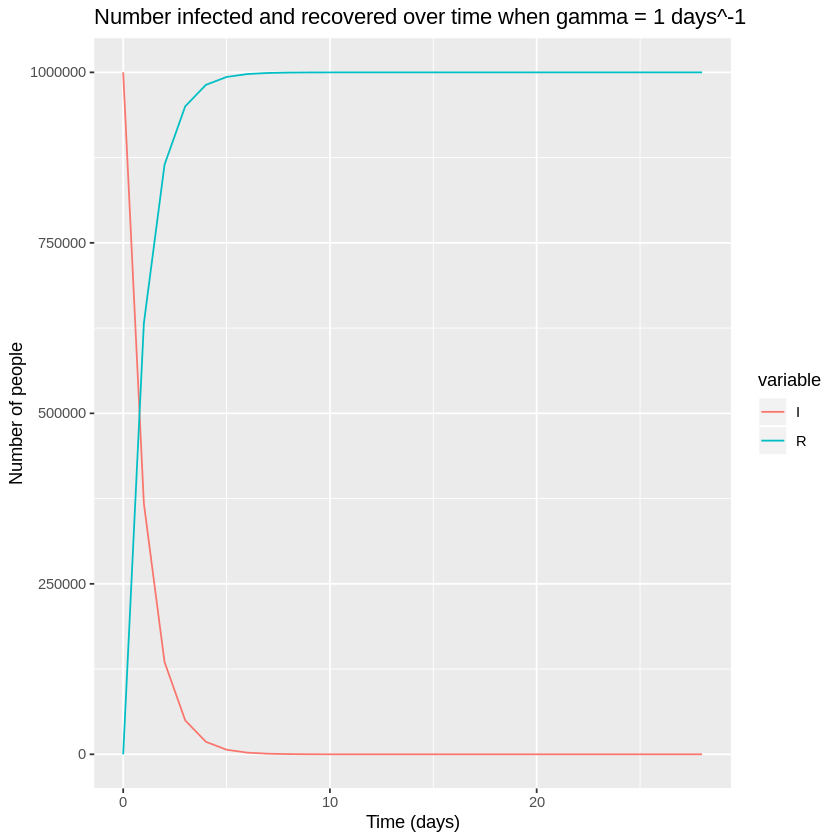

In [33]:
# First turn the output dataset into a long format, so that the number in each compartment at each timestep
# are all in the same column
output_long <- melt(as.data.frame(output), id = "time")                  

# Plot the number of people in each compartment over time
ggplot(data = output_long,                                               # specify object containing data to plot
        aes(x = time, y = value, colour = variable, group = variable))+  
       # in the long-format output dataset, the number in each compartment is in the "value" column and the 
       # compartment the number relates to is in the "variable" column. We are telling ggplot to assign a different 
       # colour to each compartment/group, which automatically generates a legend
  geom_line() +                                                          
       # we want to represent the data over time as lines. This command automatically looks to the specifications saved
       # in the ggplot command above to know which data to plot
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(title = paste("Number infected and recovered over time when gamma =",parameters["gamma"],"days^-1")) # add title
# Using the paste() command, we can combine sentences with the values stored in variables (here gamma)

### Question: Based on the plot, at what timepoint were infected and recovered individuals equal in number?

For the last part of the etivity, try varying *gamma* to see how it affects the output. For example, in the cell below change *gamma* to correspond to an average infectious period of 2 days and 20 days. What is the recovery rate in these 2 cases?

7 days

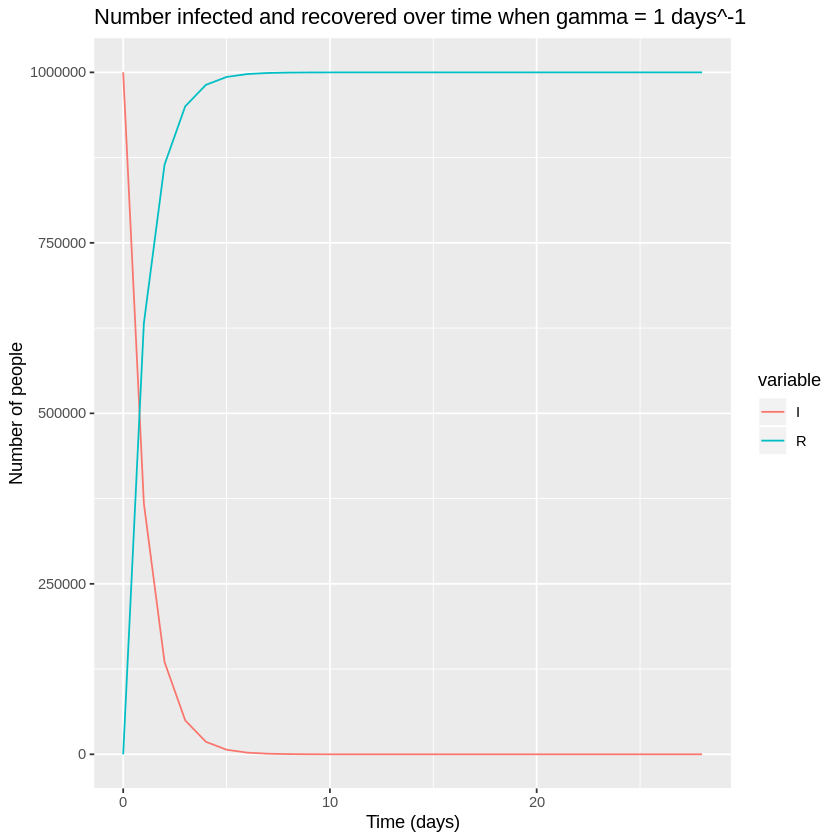

In [34]:
parameters <- c(gamma = 1.0)
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(title = paste("Number infected and recovered over time when gamma =",parameters["gamma"],"days^-1")) # add title              
# Since the initial number in each compartment and the timesteps of interest haven't changed, 
# these are the only parts of the code we need to rerun.

# Now, copy-paste your plot code from above here to visualise the output.

### Question: What changes do you observe in the transition to the recovered compartment if *gamma* is higher or lower? For example, how long does it take for everyone to recover in both cases?

higher gamma, faster recovery time

## Well done on writing your first model code. Now, check the solutions!
Once you are done with an etivity, you can open the "Solutions to etivities" folder in your Jupyter workspace. In this folder, you will find feedback and model code for all the coding etivities throughout the course. After completing an exercise, you should always carefully compare your answers and code with the solutions! It is especially important to get the coding right from the start, because we are building on the same modelling framework throughout the course. Additionally, the solution files sometimes contain further information that will help you deepen your understanding of the lesson.  
To make the most of the learning experience, we always recommend trying to complete the whole etivity before checking the solutions - but if you are stuck at any point, they can also help you to move on to the next part.